<a href="https://colab.research.google.com/github/zhaojianghe16/Airplay-SDK/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir(r"/content/drive/Shareddrives/MSBA Python/ML 401/Final") 

## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

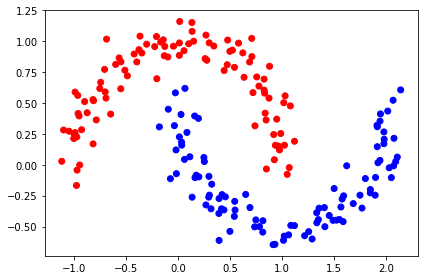

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors

X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
import tensorflow as tf
from numpy.random import seed
import random as rn
rn.seed(12)
np.random.seed(12)
tf.compat.v1.set_random_seed(12)
seed(1)
tf.random.set_seed(12)

In [ ]:
### YOUR CODE HERE ### (2 lines)
perceptron = Sequential()
perceptron.add(Dense(1,input_dim = 2, activation='sigmoid')) 

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [ ]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron

In [ ]:
### YOUR CODE HERE ### (1 line)
history =perceptron.fit(X_train,y_train, validation_data= (X_test, y_test),epochs= 2000) 

Epoch 1/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.6332 - val_loss: 0.6308
Epoch 2/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.6188 - val_loss: 0.6285
Epoch 3/2000
5/5 [==============================] - 0s 8ms/step - loss: 0.6228 - val_loss: 0.6255
Epoch 4/2000
5/5 [==============================] - 0s 8ms/step - loss: 0.6273 - val_loss: 0.6220
Epoch 5/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.6220 - val_loss: 0.6185
Epoch 6/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.6124 - val_loss: 0.6149
Epoch 7/2000
5/5 [==============================] - 0s 8ms/step - loss: 0.6146 - val_loss: 0.6113
Epoch 8/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.5979 - val_loss: 0.6077
Epoch 9/2000
5/5 [==============================] - 0s 8ms/step - loss: 0.5967 - val_loss: 0.6042
Epoch 10/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.5915 - val_loss: 0.6008
Epoch 11/2000
5/5 

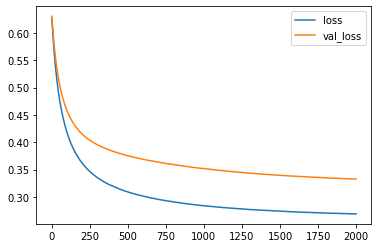

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
print(perceptron.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


Q3. Compute accuracy (Please do not use get_accuracy())

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [ ]:
 ### YOUR CODE HERE ### 
 predictions = perceptron.predict_classes(X_train)
 accuracy_score(predictions,y_train)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8875

In [ ]:
 predictions_val = perceptron.predict_classes(X_test)
 accuracy_score(predictions_val,y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.85

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

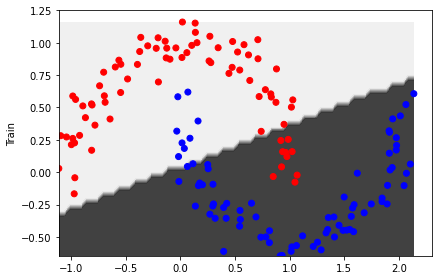

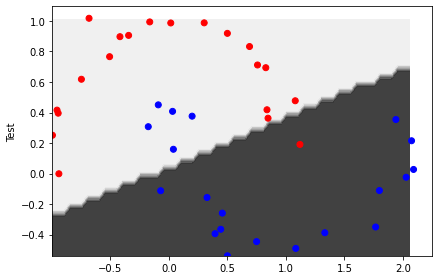

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the second exercise, use Keras to create a 2 layer neural network by completing build_one_output_model(). Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
# We will go over specific activation functions throughout the class.
from keras.layers import Dense
# SGD is the learning algorithm we will use
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with appropriate input dimension
    model.add(Dense(2,input_dim = 2,activation='relu'))                       
    # Add a final output layer with 1 unit 
    model.add(Dense(1, activation='sigmoid'))
    ######################

    sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)  #Stochastic gradient descent
    model.compile(loss="binary_crossentropy", optimizer=sgd)
    return model

In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
history1 = model.fit(X_train,y_train,epochs=750, validation_data=(X_test,y_test)   )

Epoch 1/750
5/5 [==============================] - 0s 34ms/step - loss: 0.6738 - val_loss: 0.6782
Epoch 2/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6732 - val_loss: 0.6769
Epoch 3/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6691 - val_loss: 0.6753
Epoch 4/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6642 - val_loss: 0.6734
Epoch 5/750
5/5 [==============================] - 0s 10ms/step - loss: 0.6622 - val_loss: 0.6714
Epoch 6/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6628 - val_loss: 0.6694
Epoch 7/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6539 - val_loss: 0.6673
Epoch 8/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6605 - val_loss: 0.6652
Epoch 9/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6528 - val_loss: 0.6631
Epoch 10/750
5/5 [==============================] - 0s 9ms/step - loss: 0.6505 - val_loss: 0.6611
Epoch 11/750
5/5 [=========

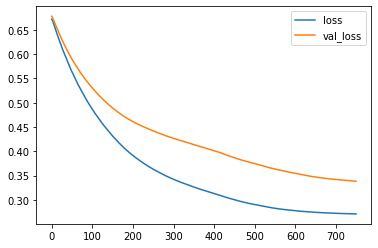

In [ ]:
pd.DataFrame(history1.history)[['loss','val_loss']].plot() 

In [ ]:
###
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


Q3. Compute accuracy (Please do not use get_accuracy())

In [ ]:
### YOUR CODE HERE ###
# # Print out accuracy
model_val = model.predict_classes(X_test)
accuracy_score(model_val,y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.85

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

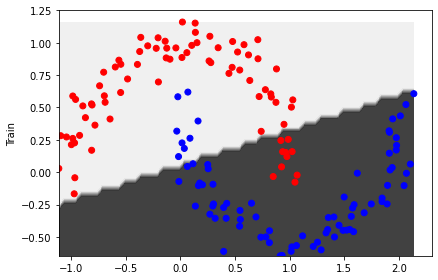

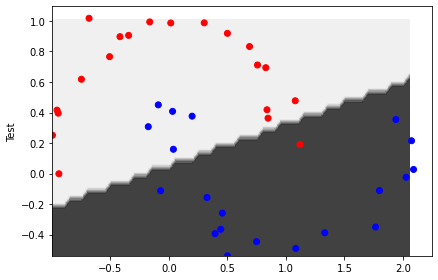

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [ ]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]


In [ ]:
y_train_vectorized.shape

(160, 2)

The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1. Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # First add a fully-connected (Dense) hidden layer with appropriate input dimension
 
    model.add(Dense(10 ,input_dim = 2 , activation='relu'))   

    # Now our second hidden layer 
    model.add(Dense(5, activation='relu'))

    # Finally, add a readout layer
    model.add(Dense(2,activation='softmax'))
    ######################

    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd, metrics=["accuracy"])
    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
y_test_vectorized = to_categorical(y_test)

In [ ]:
### YOUR CODE HERE ###

history2 = model.fit(X_train,y_train_vectorized,epochs=600, validation_data=(X_test,y_test_vectorized),batch_size=10) # We include batch size = 10 to have it run faster.

Epoch 1/600
16/16 [==============================] - 0s 13ms/step - loss: 0.6810 - accuracy: 0.6147 - val_loss: 0.6779 - val_accuracy: 0.6500
Epoch 2/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6361 - val_loss: 0.6670 - val_accuracy: 0.6750
Epoch 3/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6620 - val_loss: 0.6559 - val_accuracy: 0.6500
Epoch 4/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.7386 - val_loss: 0.6454 - val_accuracy: 0.6500
Epoch 5/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6263 - accuracy: 0.7644 - val_loss: 0.6352 - val_accuracy: 0.6750
Epoch 6/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7412 - val_loss: 0.6255 - val_accuracy: 0.6750
Epoch 7/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.7438 - val_loss: 0.6157 - val_accuracy: 0.6500
Epoch 8/600


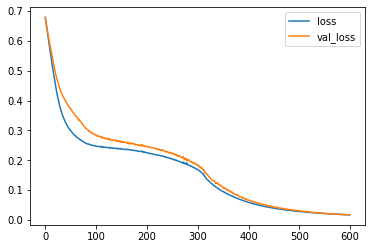

In [ ]:
pd.DataFrame(history2.history)[['loss','val_loss']].plot() 

In [ ]:
# Print out accuracy
print('test')
print(get_accuracy(model, X_test, y_test))
print('train')
print(get_accuracy(model, X_train, y_train))

test
1.0
train
1.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

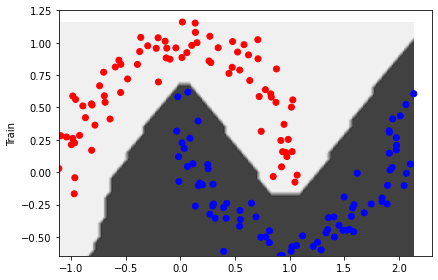

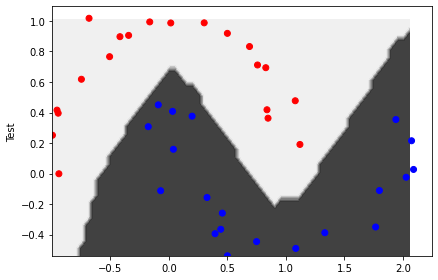

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans-

If we choose too high a learning rate for full batch gradient descent, we may not be able to reach the optimal value as we will overshoot the optimal value. This is because if the learning rate is too high, when the weights are updated, they overshoot their optimal values. This issue of training with high learning rate is not as severe for stochastic gradient descent. Gradient Descent with a large step size may converge to a suboptimal solution.

Since SGD looks at mini-batches of data rather than the full dataset, having a large learning rate may introduce more variance during training on each step as the gradient for each mini-batch is more volatile in this setting. Since SGD is not guaranteed to move towards the minimum, with a large learning rate we may observe wild movements away from the minimum. Furthemore, since SGD is not guaranteed to converge, but rather it leads to parameters in the vicinity of the minimum of the cost function, a large learning rate may mean that SGD does not get as close to the cost function's minimum point. 

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans-

A method of data augmentation that is helpful for classifying images of dogs and cats is **random cropping** of the image. This may allow the model to recognise a dog or a cat even if certain features are missing. However, this method may not be as helpful for classifying handwritten digits. For example, random cropping a handwritten digit may not work when it comes to classifying between a cropped 6 and 0 since a cropped 6 and 0 may look very similar.

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A

Ans-

For the two above networks, we observe that the number of weights in each network are: 

Number of weights in A: ( 100 + 1 ) * 100 = 10100

Number of weights in B: ( 100 + 1 ) \* 10 + ( 10 + 1 ) * 100 = 1010 + 1100 = 2110

\

One advantage of A over B:

There are more trainable weights in A. This means that A has more power to learn since it has a greater amount of neurons. However, a possible drawback is that this may cause overfitting. 

\

One advantage of B over A:

B has more depth. Since B has more layers, we should be able to extract  higher level features. Furthermore, since B has less weights, B requires less time to train and he less complexity. It is thus less likely to overfit.



# Exercise 5:

Now let's revisit the classification problem in Homework2. 

income.csv contains the features. It has 3706 records. First 2800 observations are used for training dataset, the remaining observations are used for validation dataset.

income_Xtest.csv contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
Apply standardization to continuous values<br/> 
Convert categorical variables into one-hot encodings(including the output variable consisting of ">50" or "<=50"). Note that in neural network, we don't need to drop one category. <br/>
Split data into train and validation set<br/>

In [ ]:
### YOUR CODE HERE ###
# Load your training data set and test data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
income = pd.read_csv('https://raw.githubusercontent.com/zhaojianghe16/Public_Save_File_Online/master/income.csv')
X_test= pd.read_csv('https://raw.githubusercontent.com/zhaojianghe16/Public_Save_File_Online/master/income_Xtest.csv')


# Clean the dataset: remove the rows with " ?"
print("income shape",income.shape)
find_question_mark = income == " ?" 
find_question_mark_index = find_question_mark.sum(axis=1) == 0 
income2 = income[find_question_mark_index]  # subset the rows without " ?"
print("income shape",income2.shape)

# Clean X_test
find_question_mark_test = X_test == " ?" 
find_question_mark_index_test = find_question_mark_test.sum(axis=1) == 0 
print("X_test.shape",X_test.shape)
X_test =X_test[find_question_mark_index_test] # subset the rows without " ?"
print("X_test.shape",X_test.shape)


# Split data into X and y
y = income2.pop('income').to_frame()
X = income2
print(X.shape)
print(y.shape)


y = pd.DataFrame(OneHotEncoder().fit_transform(y.to_numpy().reshape(-1,1)).toarray())

#Apply standardization to continuous values and one-hot encoding


continuous_features = [ 'age', 'fnlwgt', 'education-num' , 'capital-gain', 'capital-loss' , 'hours-per-week' ]
categorical_features = [ 'workclass', 'education',  'marital-status',  'occupation' , 'relationship' ,  'race' , 'sex', 'native-country' ]
feature = income2[continuous_features]
scaler = StandardScaler()
scaler.fit(feature)
feature = scaler.transform(feature)
feature= pd.DataFrame(feature, columns=continuous_features)

encoder = OneHotEncoder(handle_unknown='error')             
encoder.fit(income2[categorical_features])
 
encoded = encoder.transform(income2[categorical_features]).toarray()

categorical_features_df = pd.DataFrame(encoded)
categorical_features_df.columns = list(encoder.get_feature_names())

X = feature.join(categorical_features_df)

print('categorical_features_df.shape ', categorical_features_df.shape )
print('feature.shape',feature.shape )
print('X.shape', X.shape)

feature2 = X_test[continuous_features]
feature2 = scaler.transform(feature2)
feature2= pd.DataFrame(feature2, columns=continuous_features)

encoded2 = encoder.transform(X_test[categorical_features]).toarray()
categorical_features_df2 = pd.DataFrame(encoded2)
categorical_features_df2.columns = list(encoder.get_feature_names())

X_test = feature2.join(categorical_features_df2)
print('X.shape', X.shape)
print('X_test.shape',X_test.shape)


######################
# Split data into training and validation set
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,:]

income shape (3706, 15)
income shape (3411, 15)
X_test.shape (1000, 14)
X_test.shape (926, 14)
(3411, 14)
(3411, 1)
categorical_features_df.shape  (3411, 96)
feature.shape (3411, 6)
X.shape (3411, 102)
X.shape (3411, 102)
X_test.shape (926, 102)


In [ ]:
# Print out the shape of X_train
X_train.shape

(2800, 102)

In [ ]:
y_train.shape

(2800, 2)

In [ ]:
X_test.shape

(926, 102)

Q2. Build a neural network to predict the output in the income dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # Use dropout to randomly turn off certian percentage of neurons
    model.add(Dense( 256 ,input_dim= 102, activation='relu' )) # 
    model.add(Dropout(0.3))  
    model.add(Dense( 128  , activation='relu' )) # 
    model.add(Dropout(0.2))
    model.add(Dense( 128  , activation='relu' )) # 
    model.add(Dropout(0.2))
    model.add(Dense( 64  , activation='relu' )) # 
    model.add(Dropout(0.1))

    model.add(Dense( 2, activation='softmax' ))
    
    ######################
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])   

    return model

Q3. Fit the model by training set

In [ ]:
### YOUR CODE HERE ###
model= build_final_model()
history_nn = model.fit(X_train, y_train, epochs=40   , validation_data=(X_val,y_val))
print(model.summary())

Epoch 1/40
88/88 [==============================] - 1s 7ms/step - loss: 0.4531 - accuracy: 0.9327 - val_loss: 0.7945 - val_accuracy: 0.7087
Epoch 2/40
88/88 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9510 - val_loss: 0.8710 - val_accuracy: 0.7087
Epoch 3/40
88/88 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9441 - val_loss: 0.8468 - val_accuracy: 0.7087
Epoch 4/40
88/88 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9504 - val_loss: 0.8244 - val_accuracy: 0.7087
Epoch 5/40
88/88 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9514 - val_loss: 0.7756 - val_accuracy: 0.7087
Epoch 6/40
88/88 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9516 - val_loss: 0.7422 - val_accuracy: 0.7087
Epoch 7/40
88/88 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9406 - val_loss: 0.7389 - val_accuracy: 0.7087
Epoch 8/40
88/88 [==

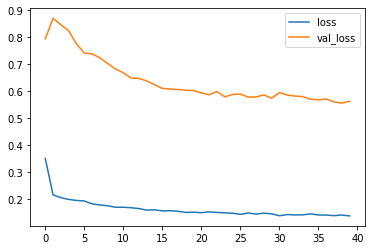

In [ ]:
pd.DataFrame(history_nn.history)[['loss','val_loss']].plot()

Q4. Obtain predictions on validation set and print accuracy,precision,recall 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
#obtain predictions on validation set 
### YOUR CODE HERE ###

y_pred = model.predict_classes(X_val)

# Print accuracy,precision,recall 
### YOUR CODE HERE ###
print('accuracy_score',accuracy_score(y_val[1], y_pred))
print('precision_score',precision_score(y_val[1], y_pred))
print('recall_score',recall_score(y_val[1], y_pred)) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy_score 0.7430441898527005
precision_score 1.0
recall_score 0.11797752808988764


Q5. Plot the ROC curve by giving appropriate names for title and axes. 

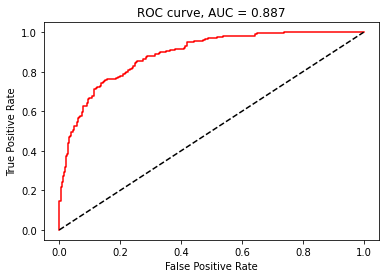

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val[1], model.predict(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

#### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models. Note: when you transfrom the target as a single binary vector, please make sure >50 is 1, <=50 is 0

Q6. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You can apply any method that we learned before to find the best parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    pipe = Pipeline([('classifier' , LogisticRegression())])
    param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','lbfgs']}
    ]

    model = GridSearchCV(  pipe  , param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
   
    ######################
    return model 
     # Return a logistic model with the best parameters you found

Q7. Fit the model by training set, obtain predictions on validation set and compute accuracy,precision,recall

In [ ]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall
### YOUR CODE HERE ###
model_logit= logistic_regression_model(X_train, y_train)
best_logit = model_logit.fit(X_train, y_train[1].values.ravel())          
print('grid_search.best_params_',best_logit.best_params_)
print('best_score_',best_logit.best_score_)
y_pred1 = best_logit.predict(X_val)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.6s


grid_search.best_params_ {'classifier': LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 0.08858667904100823, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
best_score_ 0.9517857142857142


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.2s finished


In [ ]:
print ("Precision:", precision_score(y_val[1], y_pred1)) 
print ("Recall:", recall_score(y_val[1], y_pred1))
print ("Accuracy:", accuracy_score(y_val[1], y_pred1)) 

Precision: 0.9393939393939394
Recall: 0.17415730337078653
Accuracy: 0.7561374795417348


Q8. Plot the ROC curve by giving appropriate names for title and axes. 

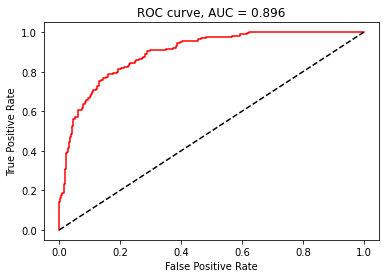

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val[1], model_logit.decision_function(X_val))
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

Q9. Implement a function random_forest_model that returns a random forest model with the best paprameters. You can apply any method that we learned before to find the best parameters. (Please set the random state to be 26)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26)# Please set the random state to be 26
    ### YOUR CODE HERE ###

    param_grid = {
    'max_depth': [  None,5, 10,15,25   ],
    'max_features': [ 'auto', 3, 'sqrt', 'log2' ],
    'min_samples_leaf': [ 3, 5,7 ],
    'min_samples_split': [  7, 17  ] ,
    'n_estimators': [  5, 11 ]
    }

    model = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2) 

    ######################
    return model
    # Return a logistic model with the best parameters you found and random_state=26

Q10. Fit the model by training set, obtain predictions on validation set and compute accuracy,precision,recall

In [ ]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall
### YOUR CODE HERE ###

best_rf_model =random_forest_model(X_train, y_train)
best_rf_model.fit(X_train, y_train[1].values.ravel())
print('grid_search.best_params_',best_rf_model.best_params_)
print('best_score_',best_rf_model.best_score_)

y_pred2 = best_rf_model.predict(X_val)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    6.1s


grid_search.best_params_ {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 17, 'n_estimators': 5}
best_score_ 0.23278785198289845


[Parallel(n_jobs=-1)]: Done 1193 out of 1200 | elapsed:   12.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   12.7s finished


In [ ]:
print ("Precision:", precision_score(y_val[1], y_pred2)) 
print ("Recall:", recall_score(y_val[1], y_pred2))
print ("Accuracy:", accuracy_score(y_val[1], y_pred2)) 

Precision: 0.9666666666666667
Recall: 0.16292134831460675
Accuracy: 0.7545008183306056


Q11. Plot the ROC curve by giving appropriate names for title and axes.

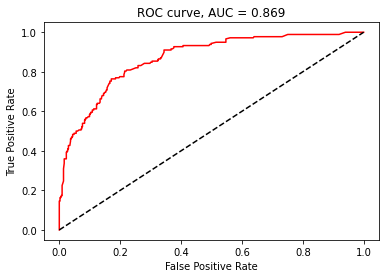

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val[1], best_rf_model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

Q12: Which of the above 3 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans- 

Neural networks:

- Precision: 1.0
- Recall: 0.11797752808988764
- Accuracy: 0.7430441898527005

Logistic Regression:

- Precision: 0.9393939393939394
- Recall: 0.17415730337078653
- Accuracy: 0.7561374795417348

Random Forest:

- Precision: 0.9666666666666667
- Recall: 0.16292134831460675
- Accuracy: 0.7545008183306056

Based on our results, we found that the Neural Networks worked best for us. 

Since this data set is imbalanced with lots of 0s compared to 1s, we choose to focus on the Precion and Recall metrics primarily. We found that all our models performed quite high on Precision and low on Recall. If we assume that the context for running this model is doing a promotion for or sending gifts to high value customers, we would want to make sure that if we predict a customer has an income aboe 50k, the probability that the customer actually makes above 50k is as high as possible. Therefore, we should choose precision as our primary metric. Given this, we concluded to use Neural Networks. 

If the cost of missing false negative is very high, for example, a test of COVID 19 is false negative, we should choose the model with the highest recall.

From our results, it appears that the Neural Network performed the best of the three models with comparable Precision but worse Recall compared to the other two models. The Neural Network may have performed better because it is a more flexible model with higher complexity which can generalise better on test data. Neural Networks are more able to identify interactions between features for better prediction results.

Logistic Regression and Random Forest were both able to get relatively comparable Precision while having higher Recall. Both these models may have performed worse on Precision since they are simpler models which may underfit the complexity of the problem. Random Forest may perform less well since there may be certain features that represent good splits of the data that lead the algorithm away from a model which predicts higher precision on average. Logistic Regression can only model a linear combination of the features and thus may ignore non-linear features which better explain the data.

Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
y_pred = model.predict_classes(X_val)   
y_pred
# y_pred =

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

Usually, in CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is the MNIST digits classification dataset. This is a dataset of 60,000 28x28 images of the 10 digits, along with a test set of 10,000 images.

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


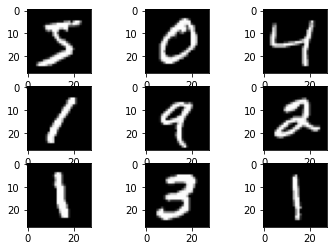

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1).

Please reshape MNIST to indicate each image only contains 1 channel (depth=1). 

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)  

In [ ]:
print(x_train.shape)
# print(y_train.shape)
print(x_test.shape)
# print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


The pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.astype('float32') 
x_train = x_train/255.0

x_test = x_test.astype('float32')
x_test = x_test/255.0

Q3. You also need to encode the target values into binary values (one-hot encoding)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( handle_unknown='error')                 
encoder.fit(pd.DataFrame(y_train)) 
encoded = encoder.transform(pd.DataFrame(y_train)).toarray()
y_train = pd.DataFrame(encoded)
y_train.columns = list(encoder.get_feature_names())
###
encoded = encoder.transform(pd.DataFrame(y_test)).toarray()
y_test = pd.DataFrame(encoded)
y_test.columns = list(encoder.get_feature_names())

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with kernel size 5x5
- Another MaxPool layer of size 2x2
- Flatten it
- Add one fully-connected layer
- Finally, output your classification by another fully-connected layer

The number of units/fitlers in each convolution/full-connected layer is determined by yourself. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten

def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Conv2D(32, kernel_size =(5,5), activation = 'relu' ))
    model.add(MaxPool2D(2))
    model.add(Conv2D(32, kernel_size =(5,5), activation = 'relu' ))
    model.add(MaxPool2D(2))
    model.add(Dense(10,activation= 'relu'))   
    model.add(Flatten())
    model.add(Dense(10,activation= 'softmax'))   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###
model.fit(x_train, y_train,epochs=20 ,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4419 - accuracy: 0.8619 - val_loss: 0.0680 - val_accuracy: 0.9772
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0481 - val_accuracy: 0.9838
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0419 - val_accuracy: 0.9849
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0327 - val_accuracy:

Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.04756249859929085
Test accuracy: 0.9900000095367432


Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 fallen layer and 3 full-connected layers

The number of units in each full-connected layer is determined by yourself. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters with those in CNN model for comparison)

In [ ]:
model2.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5149 - accuracy: 0.8512 - val_loss: 0.1534 - val_accuracy: 0.9520
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9594 - val_loss: 0.1132 - val_accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.1045 - val_accuracy: 0.9691
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9772 - val_loss: 0.0947 - val_accuracy: 0.9714
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0968 - val_accuracy: 0.9728
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.0855 - val_accuracy: 0.9752
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0875 - val_accuracy:

Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
score = model2.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.14038871228694916
Test accuracy: 0.9746999740600586


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans-
The first model is better. The first model perfoms better because it is using convolutional layers to extract the information from an area of multiple pixels. Pixels that are close to each other tend to represent a specific pattern for an image. This would be more helpful than the MLP model which is not designed to look at specific regions. It neglects the spatial relationship between pixels. 

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning. One of the examples is autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress them into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder

You only need to define an encoder and a decoder by adding several layers. In your encoder, you are required to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You need to determine the number of fully-connected layers, number of units, and activation functions by yourself. Remember your goal is to minimize validation loss of you reconstructed the images.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.layers import Flatten

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input
# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded.add(Flatten())
encoded.add(Dense(512,activation='relu') )
encoded.add(Dense(256,activation='relu') )
encoded.add(Dense(128,activation='relu') )
encoded.add(Dense(encoding_dim,activation='relu') )
######################
# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Dense(128, activation = 'relu'))
decoded.add(Dense(256, activation = 'relu'))
decoded.add(Dense(512, activation = 'relu'))   

decoded.add(Dense(784, activation = 'sigmoid'))
decoded.add(Reshape((28,28)))
###################### Code belows were given

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
history = autoencoder.fit(x=x_train,y= x_train,epochs=50, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0518 - val_loss: 0.0324
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0317 - val_loss: 0.0299
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - val_loss: 0.0281
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - val_loss: 0.0273
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - val_loss: 0.0264
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0259 - val_loss: 0.0260
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - val_loss: 0.0255
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - val_loss: 0.0253
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - val_loss: 0.0252
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.024

Q3. Test your autoencoder on test set, print out the MSE and output images as numpy arrays

In [ ]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###

results = autoencoder.evaluate(x_test, x_test, verbose=0)  
print("val loss(MSE):", results)

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

val loss(MSE): 0.02359309233725071


Plot your encoded image

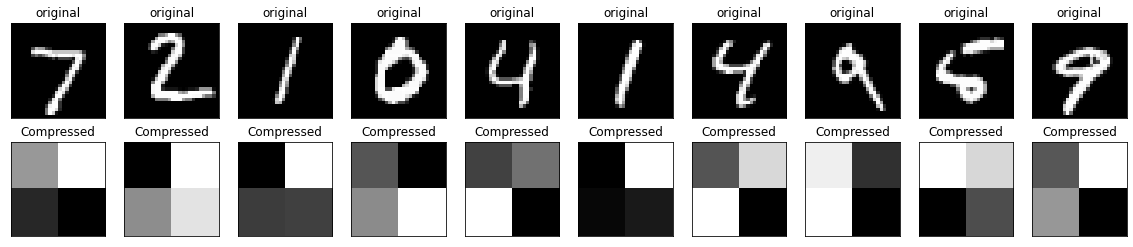

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

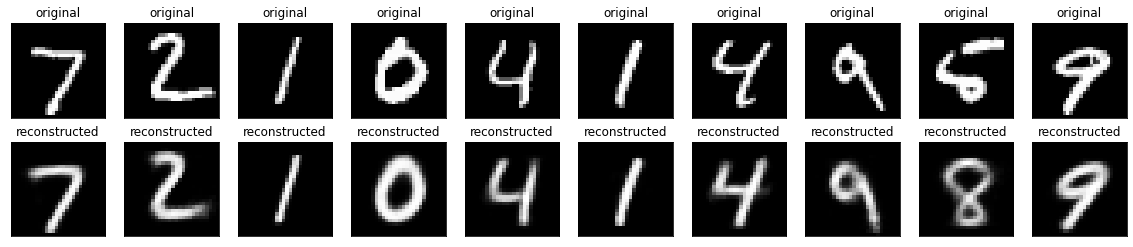

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Exercise 8
### Denoising Autoencoder

Except fully-connected layers, an autoencoder can also consist of other types of layers such as CNN or RNN. Here, we will see an example with convolution layers.

Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

Again, we will continue using MNIST dataset.

In [ ]:
# Add some white noise into the original MNIST images
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Plot the noised images

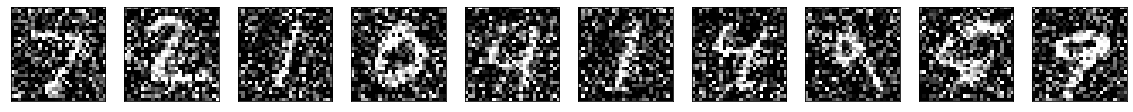

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q1. Implement an CNN autoencoder model consisting of an encoder and a decoder. 

The encoder takes an input of image, passes it to 
- A convolution layer
- A MaxPool layer
- Another convolution layer 
- Another MaxPool layer

The decoder takes the output of the encoder as the input, passes it to 
- A convolution layer
- An UpSampling layer
- Another convolution layer
- Another UpSampling layer
- Another convolution layer

As in exercise 6, the number of fitlers in each convolution layer is determined by yourself. In addition, you are also required to determine the kernel/pool/upsampling size of each layer. Remember that your goal is to minimize the entropy loss.<br/>
Use the SAME padding for all the convolution and max pooling layers.<br/>
Use the "relu" activation function for all the hidden layers, but use the "sigmoid" activation for the final convolution layer.


(An upsampling layer is a simple layer with no weights that will enlarge the dimensions of input )

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input

In [ ]:
from keras.layers import UpSampling2D
# encoder layers
encoded = Sequential()

# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###

encoded.add(Conv2D(512,  (3, 3)  ,activation='relu', padding='same') )
encoded.add(MaxPool2D( (2,2), padding='same') )
encoded.add(Conv2D(256,  (3, 3)  ,activation='relu', padding='same') )
encoded.add(MaxPool2D( (2,2), padding='same') )

######################

# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Conv2D(256,  (3, 3)  ,activation='relu', padding='same') )  
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(512,  (3, 3)  ,activation='relu', padding='same') )   
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(1,  (3, 3)  ,activation='sigmoid', padding='same') )

######################
img_x = 28
img_y = 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Q2. Fit your model by x_train_noisy and x_train

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
autoencoder.fit(x_train_noisy, x_train ,epochs= 80, validation_data=(x_test_noisy,x_test) ,callbacks=[early_stopper] ) 

Epoch 1/80
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6170 - val_loss: 0.4879
Epoch 2/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4736 - val_loss: 0.4378
Epoch 3/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4160 - val_loss: 0.3396
Epoch 4/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3047 - val_loss: 0.2323
Epoch 5/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2238 - val_loss: 0.2040
Epoch 6/80
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2004 - val_loss: 0.1874
Epoch 7/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1851 - val_loss: 0.1760
Epoch 8/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1749 - val_loss: 0.1685
Epoch 9/80
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1685 - val_loss: 0.1634
Epoch 10/80
1875/1875 [==============================] - 16s 8ms/step - l

Q3. Evaluate your model on test set and print out the entropy loss

In [ ]:
# score = autoencoder.evaluate(x_test_noisy,x_test, verbose = 0) 

# print('Test loss:', score[0]) 
# print('Test accuracy:', score[1])
# score

results = autoencoder.evaluate(x_train_noisy, x_train)
print('train_loss, results')

results = autoencoder.evaluate(x_test_noisy,x_test)
print('val_loss, results')

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1155
train_loss, results
313/313 [==============================] - 1s 4ms/step - loss: 0.1141
val_loss, results


Plot your noised images and their corresponding reconstructed images

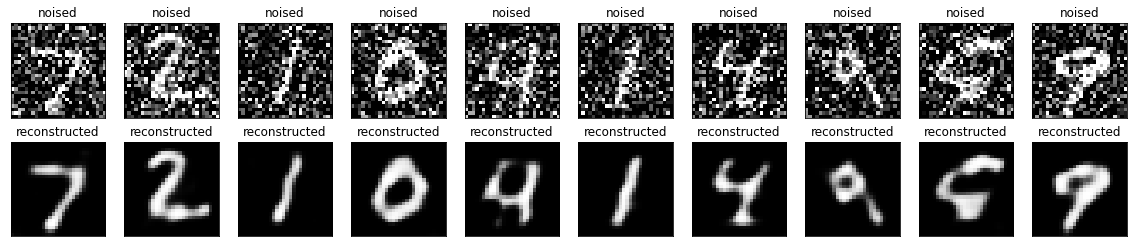

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("noised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()